In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import copy

In [2]:
class CleanData():
    """ 'btwn_frame_loops(ms)','decode(ms)','convert_rgb(ms)','filter(ms)','display(ms)','time_in_callback(ms)','avg_decoded(ms)',
    'avg_rgb(ms)','avg_filtered(ms)','avg_rendered(ms)','avg_total_time_to_display(ms)','total_slow_frames','total_callbacks',
    'real_play_time(sec)','actual_fps','total_video_frames','default_fps','max_frame_time(ms)','correct_play_time(sec)' """
    def __init__(self,name):
        self.name=self.convert_filename(name)
        self.summary_cols_names = ['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)','correct_play_time(sec)', 'actual_fps',
                'total_slow_frames']
        del_col_names = self.summary_cols_names +['total_video_frames',
                'default_fps', 'max_frame_time(ms)', 'correct_play_time(sec)', 'avg_filtered(ms)','btwn_frame_loops(ms)','total_callbacks'] #avg fileteed cuz not currently doing it
        self.og_df = pd.read_csv(name, index_col=False)
        self.df = copy.copy(self.og_df)
        self.df_summary = self.df[self.summary_cols_names]
        self.df_summary = self.df_summary.iloc[:1]
        self.df = self.df.drop(del_col_names, axis=1)

    def convert_filename(self,filename):
        basename = os.path.basename(filename)
        name_parts = basename.split('_')

        name_parts[0] = name_parts[0].replace('l_', 'linux_')
        name_parts[-1] = name_parts[-1].replace('.csv','')

        new_filename = '_'.join(name_parts)

        return new_filename

In [3]:
FILE_EXT = 'noFilterOld/'
bm_O3_db_mmu = CleanData(FILE_EXT+'bm_O3_db_mmu.csv')
print(bm_O3_db_mmu.df.shape)

(354, 6)


In [4]:
bm_O3_db_mmu.df.head(9)

,decode(ms),convert_rgb(ms),filter(ms),display(ms),time_in_callback(ms),real_play_time(sec)
0,1584,233,0,0,1818,293.087079
1,543,233,0,0,777,NaN
2,458,233,0,1,693,NaN
3,579,233,0,0,813,NaN
4,555,233,0,0,789,NaN
5,620,233,0,0,853,NaN
6,1391,233,0,0,1625,NaN
7,604,233,0,0,838,NaN
8,549,233,0,0,783,NaN


In [5]:
bm_O3_db_mmu.df_summary.head(3)

,avg_decoded(ms),avg_rgb(ms),avg_rendered(ms),avg_total_time_to_display(ms),correct_play_time(sec),actual_fps,total_slow_frames
0,597.0,233.0,0.0,832.0,14.04,1.207832,354.0


In [6]:
files = [f for f in os.listdir(FILE_EXT) if f.endswith(".csv")]
print(files)

['l_O3_defMem.csv', 'bm_O3_db_mmu.csv', 'l_O2_defMem.csv', 'bm_O3_db.csv', 'l_O2_mMem.csv', 'l_O0_mMem.csv', 'l_O1_mMem.csv', 'bm_O3_allCache.csv', 'l_O1_defMem.csv', 'bm_O3_fbcp_mmu.csv', 'bm_O3_fbcp.csv', 'l_O3_mMem.csv', 'l_O0_defMem.csv']


In [7]:
dfs = []
for file in files:
    dfs.append(CleanData(FILE_EXT+file))
dfs.sort(key=lambda x: x.name)
for d in dfs:
    print(d.name)
for df in dfs:

    df.df_summary['file'] = df.name
    df.og_df['file'] = df.name
    df.df['file'] = df.name

KeyError: "['btwn_frame_loops(ms)'] not found in axis"

In [ ]:
avg_df = pd.DataFrame()
i=0
for df in dfs:
    df.df_summary['file'] = df.name
    avg_df = pd.concat([avg_df,df.df_summary[['file','avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)']]], axis=0, ignore_index=True)

avg_df =avg_df.set_index('file')

In [ ]:
avg_df.head(10)

,avg_decoded(ms),avg_rgb(ms),avg_rendered(ms),avg_total_time_to_display(ms)
file,,,,
bm_O3_db,731.0000,353.00000,0.00000,1085.0000
bm_O3_db_mmu,597.0000,233.00000,0.00000,832.0000
bm_O3_fbcp,733.0000,354.00000,30.00000,1118.0000
bm_O3_fbcp_mmu,616.0000,235.00000,16.00000,869.0000
l_O0_defMem,51.6737,26.92360,9.60624,88.1636
l_O0_mMem,52.5710,26.80770,9.68535,89.0241
l_O1_defMem,18.5125,8.10315,10.17610,36.7918
l_O1_mMem,18.4898,8.08101,10.02270,36.5935
l_O2_defMem,17.0625,7.47081,9.85206,34.3854


In [ ]:
df_l = avg_df[avg_df.index.str.startswith('l_')]
df_bm = avg_df[avg_df.index.str.startswith('bm_')]
print(df_l)

             avg_decoded(ms)  avg_rgb(ms)  avg_rendered(ms)  \
file                                                          
l_O0_defMem          51.6737     26.92360           9.60624   
l_O0_mMem            52.5710     26.80770           9.68535   
l_O1_defMem          18.5125      8.10315          10.17610   
l_O1_mMem            18.4898      8.08101          10.02270   
l_O2_defMem          17.0625      7.47081           9.85206   
l_O2_mMem            17.0446      7.42851          10.16880   
l_O3_defMem          14.2441      7.57546          11.11180   
l_O3_mMem            14.1866      7.50699           9.98445   

             avg_total_time_to_display(ms)  
file                                        
l_O0_defMem                        88.1636  
l_O0_mMem                          89.0241  
l_O1_defMem                        36.7918  
l_O1_mMem                          36.5935  
l_O2_defMem                        34.3854  
l_O2_mMem                          34.6419  
l_O3_defM

In [ ]:
# linux_summary = df_l.describe()
# bare_metal_summary = df_bm.describe()
# print("Linux Summary:\n", linux_summary)
# print("\nBare Metal Summary:\n", bare_metal_summary)

#linux version overview:
 - the diffrent mempy implemetations make almost no diffrence
 - the gap between o0 and o1 is by far the most significant
 - o1 to o2 is very slight, o3 is slightly more significant diffrence than 2 to 1

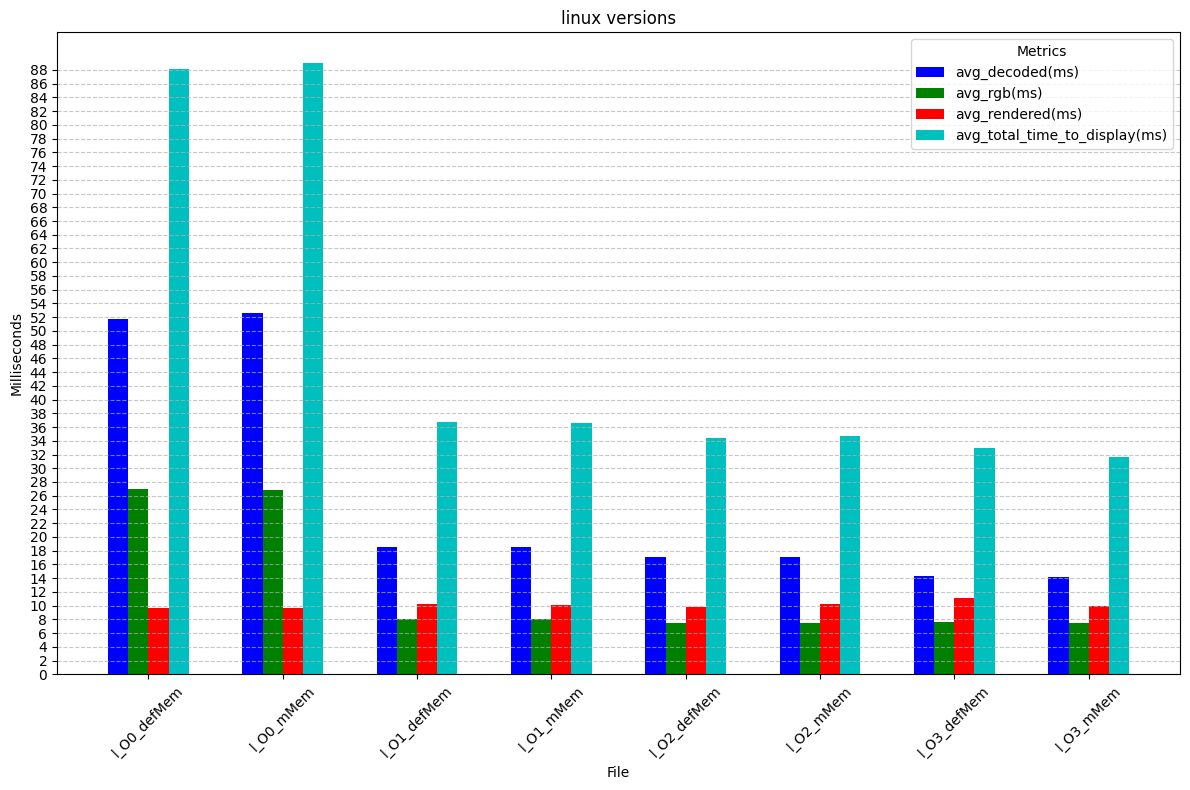

In [ ]:
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
bar_width = 0.15
x = np.arange(len(df_l.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_l.columns):
    plt.bar(x + i * bar_width, df_l[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_l.columns) - 1) * bar_width / 2, df_l.index, rotation=45)
plt.yticks(np.arange(0, df_l.max().max(), step=2))
plt.title('linux versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


#bare metal version overview:
 - performance is terrable compared to linux
 - the mmu makes a noticable improvement but not much
 - any compilation flag other than 03 is so slow there is no point
 - the rendering is the only feature that is currently compeditive with the linux version
 - the rendering is by far the fastest and most compeditive with linux in both double-bufferd and the framebuffer-copy version


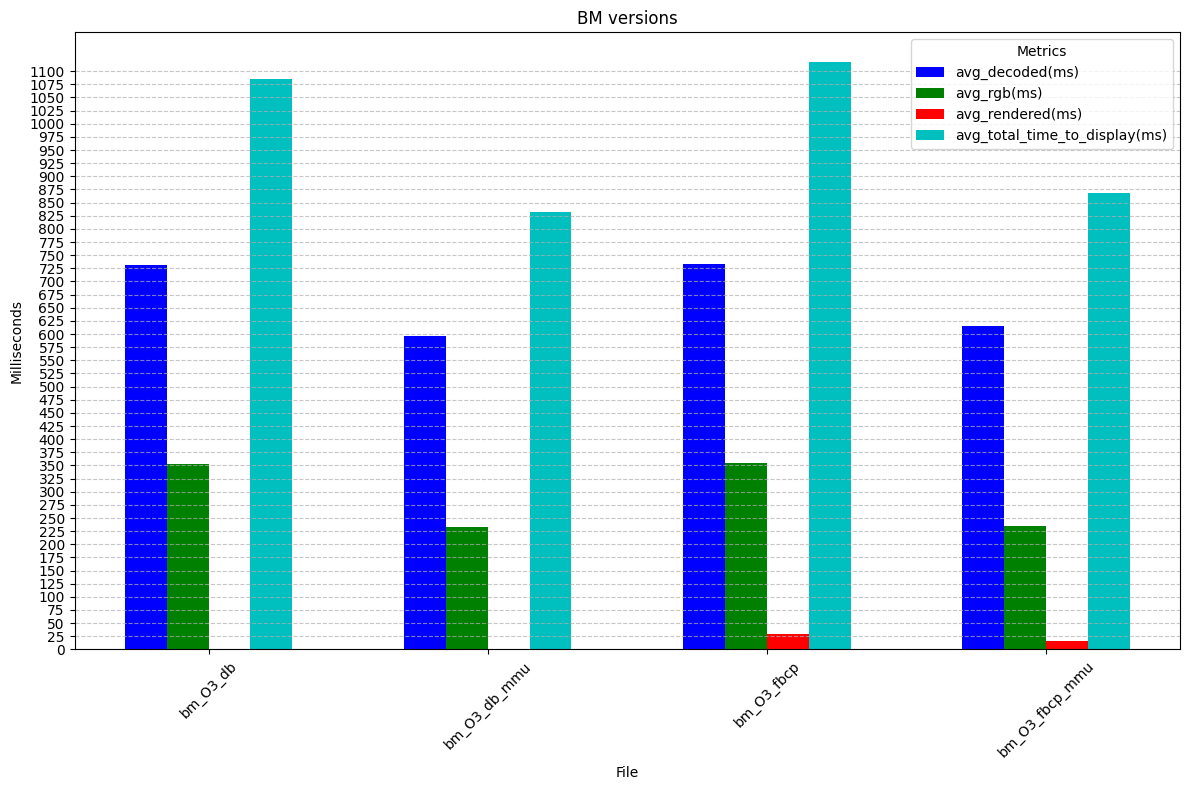

In [ ]:
x = np.arange(len(df_bm.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_bm.columns):
    plt.bar(x + i * bar_width, df_bm[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_bm.columns) - 1) * bar_width / 2, df_bm.index, rotation=45)
plt.yticks(np.arange(0, df_bm.max().max(), step=25))
plt.title('BM versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
db_fast = df_bm.loc['bm_O3_db_mmu', 'avg_total_time_to_display(ms)']
db_slow = df_bm.loc['bm_O3_db', 'avg_total_time_to_display(ms)']

fbcp_fast = df_bm.loc['bm_O3_fbcp_mmu', 'avg_total_time_to_display(ms)']
fbcp_slow = df_bm.loc['bm_O3_fbcp', 'avg_total_time_to_display(ms)']

db_speed_diff = ((db_slow - db_fast) / db_slow) * 100
fbcp_speed_diff = ((fbcp_slow - fbcp_fast) / fbcp_slow) * 100

print(f"double bufferd mmu on speed improvement: {db_speed_diff:.2f}%")
print(f"framebuffer copy mmu on speed improvement: {fbcp_speed_diff:.2f}%")

double bufferd mmu on speed improvement: 23.32%
framebuffer copy mmu on speed improvement: 22.27%


In [ ]:
df_sum = pd.DataFrame()
#['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)','correct_play_time(sec)', 'actual_fps','total_slow_frames']
for df in dfs:
    df_summary_copy = df.df_summary.copy()
    df_summary_copy['file'] = df.name
    df_sum = pd.concat([df_sum, df_summary_copy[['file', 'correct_play_time(sec)', 'actual_fps', 'total_slow_frames']]],
                       ignore_index=True)

df_sum =df_sum.set_index('file')
df_sum.head(6)

,correct_play_time(sec),actual_fps,total_slow_frames
file,,,
bm_O3_db,14.04,0.925969,354.0
bm_O3_db_mmu,14.04,1.207832,354.0
bm_O3_fbcp,14.04,0.899035,352.0
bm_O3_fbcp_mmu,14.04,1.156292,354.0
l_O0_defMem,14.04,11.415800,351.0
l_O0_mMem,14.04,11.305600,351.0


In [ ]:
best_bm_worst_l_df= pd.DataFrame()
best_bm_worst_l_df = pd.concat([best_bm_worst_l_df,df_l[df_l['avg_total_time_to_display(ms)']==df_l['avg_total_time_to_display(ms)'].max()]])
best_bm_worst_l_df = pd.concat([best_bm_worst_l_df,df_bm[df_bm['avg_total_time_to_display(ms)']==df_bm['avg_total_time_to_display(ms)'].min()]])
best_bm_worst_l_df.head(3)

,avg_decoded(ms),avg_rgb(ms),avg_rendered(ms),avg_total_time_to_display(ms)
file,,,,
l_O0_mMem,52.571,26.8077,9.68535,89.0241
bm_O3_db_mmu,597.000,233.0000,0.00000,832.0000


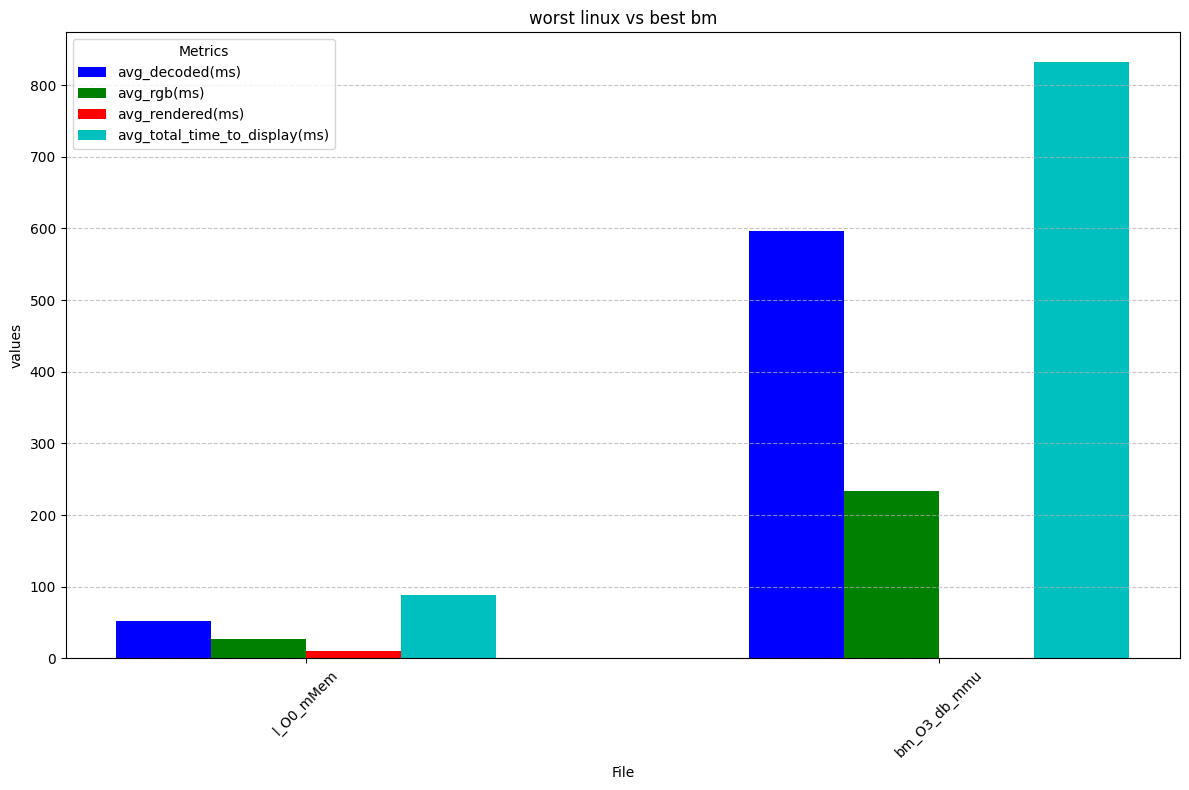

In [ ]:
x = np.arange(len(best_bm_worst_l_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_df.columns) - 1) * bar_width / 2, best_bm_worst_l_df.index, rotation=45)
plt.title('worst linux vs best bm')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
linux_avg_rendered = best_bm_worst_l_df.loc[best_bm_worst_l_df.index.str.startswith('l_'), 'avg_total_time_to_display(ms)'].values[0]
bm_avg_rendered = best_bm_worst_l_df.loc[best_bm_worst_l_df.index.str.startswith('bm_'), 'avg_total_time_to_display(ms)'].values[0]
print(linux_avg_rendered)
print(bm_avg_rendered)
speed_factor = bm_avg_rendered / linux_avg_rendered

# Print the result
print(f"linux is {speed_factor:.2f} times faster")

89.0241
832.0
linux is 9.35 times faster


The video should be playing for 14.04 seconds at 25 frames per second.
these is always some amount of slow frames but on bm they are all slow and slow here being more the 40 ms needed to be the average in order to hit the desired framerate

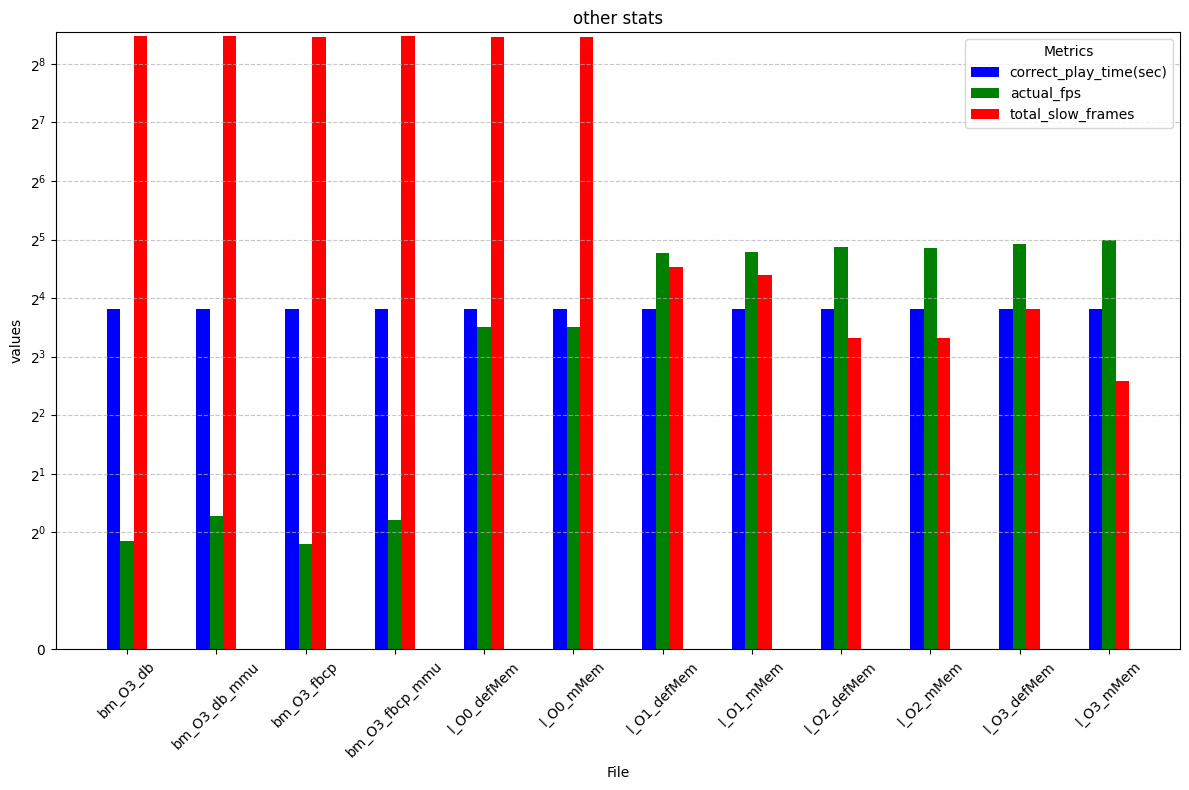

In [ ]:
x = np.arange(len(df_sum.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_sum.columns):
    plt.bar(x + i * bar_width, df_sum[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_sum.columns) - 1) * bar_width / 2, df_sum.index, rotation=45)
plt.yscale('symlog', base=2, linthresh=1)
plt.title('other stats')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [ ]:
def count_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

l_O0_defMem, decode(ms): 6
l_O0_mMem, decode(ms): 6
l_O1_defMem, decode(ms): 8
l_O1_mMem, decode(ms): 6
l_O2_defMem, decode(ms): 6
l_O2_mMem, decode(ms): 6
l_O3_defMem, decode(ms): 10
l_O3_mMem, decode(ms): 7
bm_O3_db, decode(ms):  9
bm_O3_db_mmu, decode(ms):  11
bm_O3_fbcp, decode(ms):  5
bm_O3_fbcp_mmu, decode(ms):  11


/tmp/ipykernel_302962/2019920201.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


l_O0_defMem, convert_rgb(ms): 12
l_O0_mMem, convert_rgb(ms): 10
l_O1_defMem, convert_rgb(ms): 14
l_O1_mMem, convert_rgb(ms): 14
l_O2_defMem, convert_rgb(ms): 6
l_O2_mMem, convert_rgb(ms): 25
l_O3_defMem, convert_rgb(ms): 3
l_O3_mMem, convert_rgb(ms): 12
bm_O3_db, convert_rgb(ms):  1
bm_O3_db_mmu, convert_rgb(ms):  79
bm_O3_fbcp, convert_rgb(ms):  1
bm_O3_fbcp_mmu, convert_rgb(ms):  0


/tmp/ipykernel_302962/2019920201.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


l_O0_defMem, display(ms): 19
l_O0_mMem, display(ms): 38
l_O1_defMem, display(ms): 20
l_O1_mMem, display(ms): 8
l_O2_defMem, display(ms): 10
l_O2_mMem, display(ms): 19
l_O3_defMem, display(ms): 19
l_O3_mMem, display(ms): 20
bm_O3_db, display(ms):  4
bm_O3_db_mmu, display(ms):  5
bm_O3_fbcp, display(ms):  0
bm_O3_fbcp_mmu, display(ms):  0


/tmp/ipykernel_302962/2019920201.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


l_O0_defMem, time_in_callback(ms): 7
l_O0_mMem, time_in_callback(ms): 6
l_O1_defMem, time_in_callback(ms): 13
l_O1_mMem, time_in_callback(ms): 9
l_O2_defMem, time_in_callback(ms): 11
l_O2_mMem, time_in_callback(ms): 11
l_O3_defMem, time_in_callback(ms): 18
l_O3_mMem, time_in_callback(ms): 14
bm_O3_db, time_in_callback(ms):  9
bm_O3_db_mmu, time_in_callback(ms):  11
bm_O3_fbcp, time_in_callback(ms):  5
bm_O3_fbcp_mmu, time_in_callback(ms):  11


/tmp/ipykernel_302962/2019920201.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, rotation=45, ha='right')


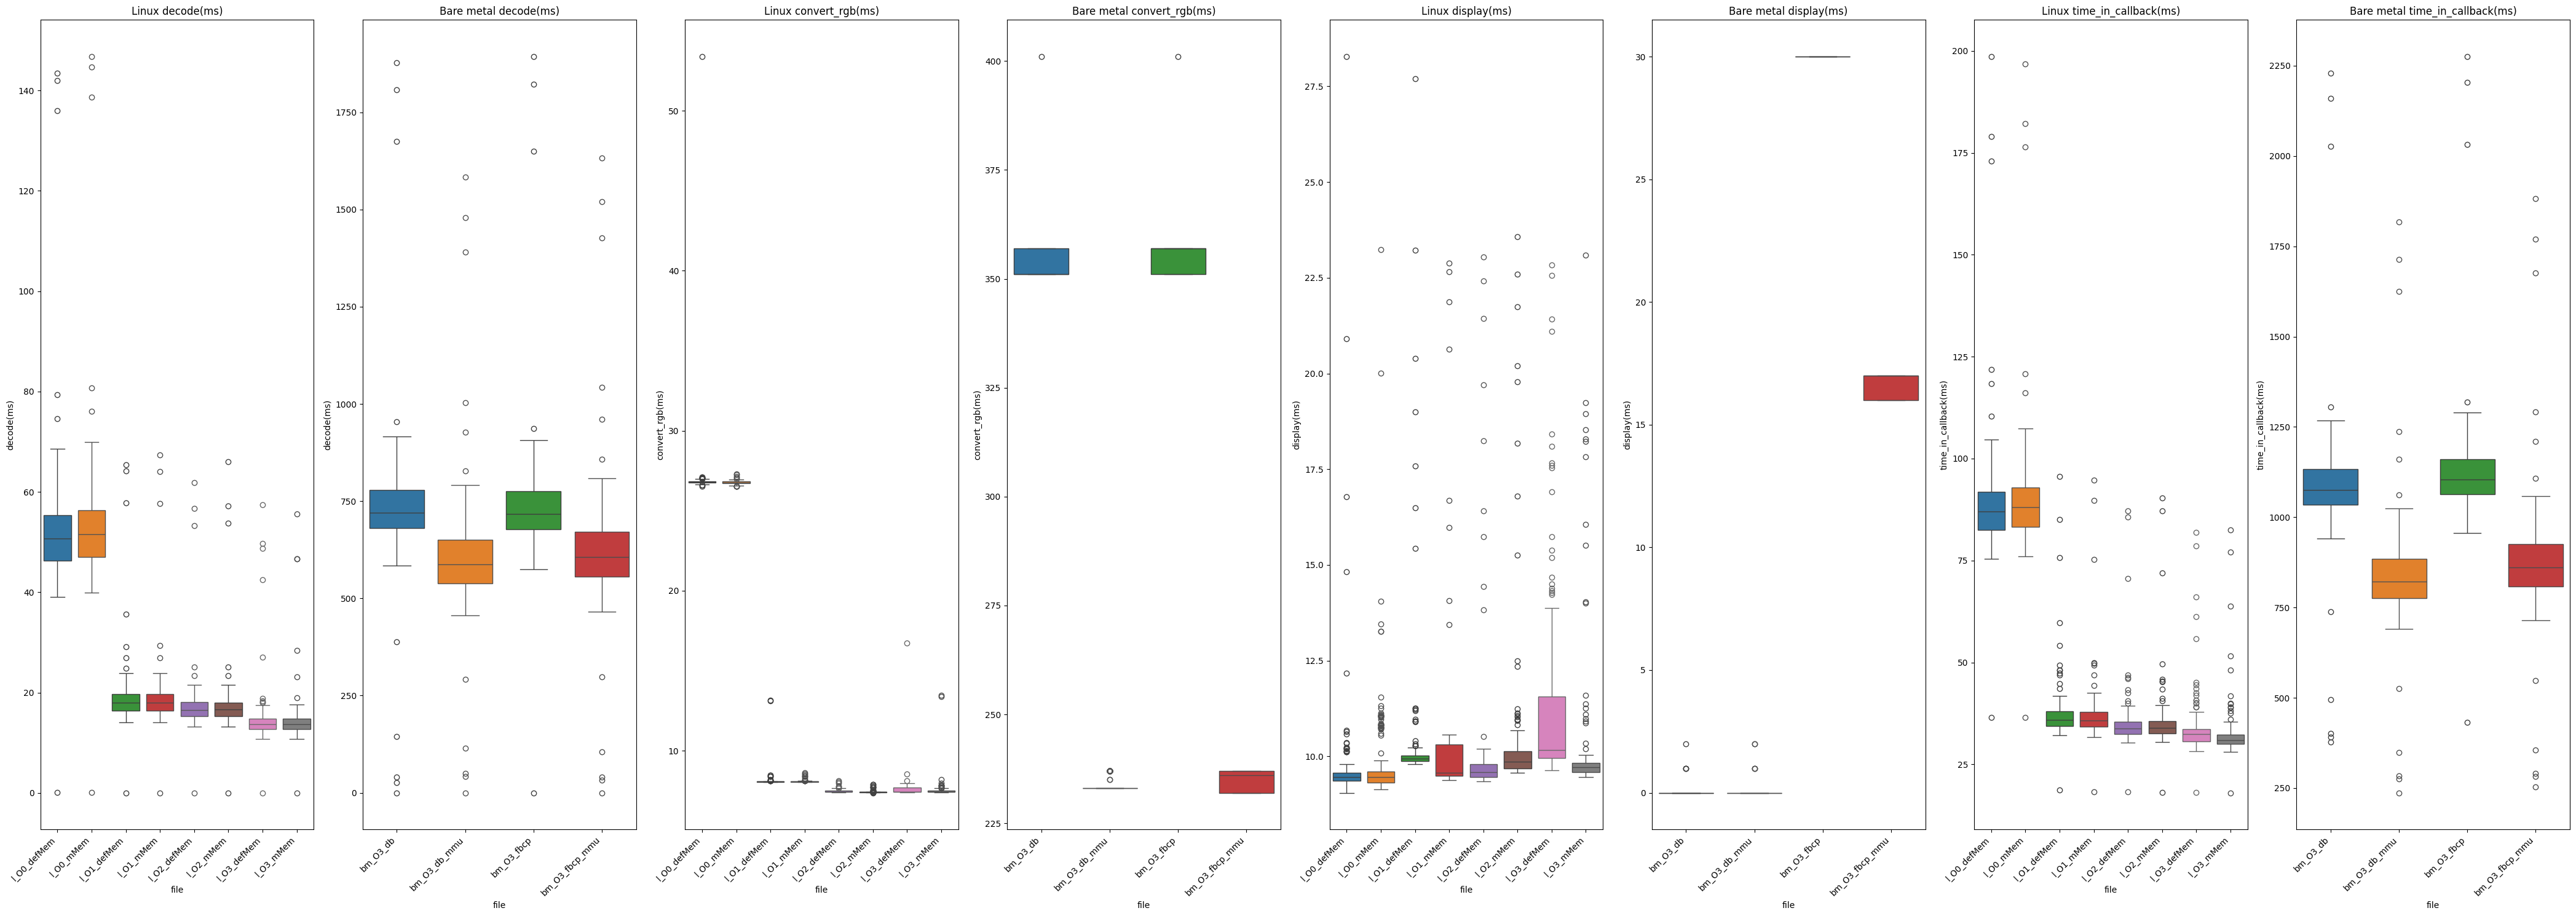

In [ ]:
num_cols = len(dfs[0].df.columns) - 4
fig, axes = plt.subplots(1, num_cols*2, figsize=(42, 15))

# Create two lists to store the 'l_' and 'bm_' dataframes separately
l_dfs = [df_obj for df_obj in dfs if df_obj.name.startswith('l_')]
bm_dfs = [df_obj for df_obj in dfs if df_obj.name.startswith('bm_')]
noshow_list = ['file','real_play_time(sec)','filter(ms)']
x = 0
for i, column in enumerate(dfs[0].df.columns ):

    if column not in noshow_list:
        ax = axes[x]

        # Plot the 'l_' dataframes
        for df_obj in l_dfs:
            sns.boxplot(x='file', y=column, data=df_obj.df, ax=ax)        # Set x-axis labels for both 'l_' and 'bm_' plots
            print(f"{df_obj.name}, {column}: {count_outliers(df_obj.df[column])}")
        x_labels = [df_obj.name for df_obj in l_dfs] + [df_obj.name for df_obj in bm_dfs]
        ax.set_xticklabels(x_labels, rotation=45, ha='right')

        ax.set_title(f'Linux {column}')
        x+=1
        ax = axes[x]


        num_bm_dfs = len(bm_dfs)
        for j, df_obj in enumerate(bm_dfs):
            sns.boxplot(x='file', y=column, data=df_obj.df, ax=ax)
            print(f"{df_obj.name}, {column}:  {count_outliers(df_obj.df[column])}")

        # Get current x-tick positions (for however many unique 'file' values exist)
        xticks = ax.get_xticks()

        # Ensure labels length matches number of ticks
        x_labels = [df_obj.name for df_obj in bm_dfs for _ in range(len(ax.get_xticks()) // len(bm_dfs))]

        ax.set_xticks(xticks)
        ax.set_xticklabels(x_labels, rotation=45, ha='right')
        ax.set_title(f'Bare metal {column}')
        if x==7:
            break
        x+=1


plt.tight_layout()
plt.show()